## WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

###  Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

api_key = ""

query_url = f"{url}appid={api_key}&units={units}&q="

In [24]:
temperatures = []
locations = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []
data = [locations, cloudiness, country, date, humidity, lat, lng, maxTemp, windSpeed]
for i in range(len(cities)):
    time.sleep(.2)
    try:
        response = requests.get(query_url + cities[i]).json()
        print("Processing Record " + str(i) + " | " + cities[i] + " " + str(response['main']['temp']))
        temperatures.append(response['main']['temp'])
        locations.append(cities[i])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
    
    except KeyError:
        print('City not found. Proceed...')
        
        

Processing Record 0 | provideniya 44.6
Processing Record 1 | tasiilaq 28.4
Processing Record 2 | kalevala 48.83
City not found. Proceed...
Processing Record 4 | hamilton 51.75
Processing Record 5 | mataura 46.67
Processing Record 6 | carutapera 76.73
Processing Record 7 | hilo 72
Processing Record 8 | port alfred 71.01
Processing Record 9 | punta arenas 41
Processing Record 10 | barrow 49.73
Processing Record 11 | lebu 55.13
Processing Record 12 | broome 50.14
City not found. Proceed...
Processing Record 14 | thompson 57.2
Processing Record 15 | hermanus 59
Processing Record 16 | ponta do sol 59.09
Processing Record 17 | hithadhoo 83.03
Processing Record 18 | lapeer 53.76
Processing Record 19 | saint anthony 61.48
Processing Record 20 | ancud 53.6
Processing Record 21 | albany 48.11
City not found. Proceed...
Processing Record 23 | necochea 46.06
Processing Record 24 | butaritari 84.65
Processing Record 25 | castro 53.6
City not found. Proceed...
City not found. Proceed...
Processing R

Processing Record 220 | neryungri 67.01
Processing Record 221 | hobyo 80.15
Processing Record 222 | nome 80.22
Processing Record 223 | lompoc 57.51
Processing Record 224 | nha trang 93.2
Processing Record 225 | vanimo 85.19
Processing Record 226 | maceio 71.6
Processing Record 227 | chapais 42.8
Processing Record 228 | camopi 72.95
Processing Record 229 | tigre 54.05
Processing Record 230 | fernie 72.59
Processing Record 231 | bonavista 48
Processing Record 232 | quang ngai 97.79
Processing Record 233 | ostrovnoy 42.89
Processing Record 234 | puerto escondido 80.6
Processing Record 235 | inuvik 50
Processing Record 236 | sinnamary 80.87
Processing Record 237 | vila franca do campo 62.6
Processing Record 238 | guerrero negro 65.21
Processing Record 239 | ailigandi 83.93
City not found. Proceed...
Processing Record 241 | antsla 54.97
Processing Record 242 | hereford 51.4
Processing Record 243 | naze 73.85
Processing Record 244 | banda aceh 84.83
Processing Record 245 | vestmanna 41
Proce

Processing Record 437 | tevaitoa 80.87
Processing Record 438 | marsa matruh 71.6
Processing Record 439 | boa vista 77
Processing Record 440 | morant bay 82.4
Processing Record 441 | aldan 74.03
Processing Record 442 | piney green 67.3
Processing Record 443 | talnakh 37.4
Processing Record 444 | dennis 57.16
Processing Record 445 | port pirie 55.4
Processing Record 446 | ketchikan 51.8
Processing Record 447 | eureka 56.57
Processing Record 448 | the valley 80.53
Processing Record 449 | bystrzyca klodzka 58.82
Processing Record 450 | nizhneudinsk 59.27
Processing Record 451 | nakhon phanom 75.2
Processing Record 452 | xinzhou 77.09
Processing Record 453 | aykhal 60.8
Processing Record 454 | saint-pierre 54
Processing Record 455 | westerland 53.15
Processing Record 456 | poya 76.73
Processing Record 457 | aguimes 71.2
City not found. Proceed...
Processing Record 459 | dodge city 69.19
Processing Record 460 | yeppoon 66.2
Processing Record 461 | miraflores 54.77
Processing Record 462 | gui

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
citiesWeather_df = pd.DataFrame()
columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
for i in range(len(columns)):
    citiesWeather_df[columns[i]] = data[i]
    
citiesWeather_df.count()


City          519
Cloudiness    519
Country       519
Date          519
Humidity      519
Lat           519
Lng           519
Max Temp      519
Wind Speed    519
dtype: int64

In [44]:
citiesWeather_df.to_csv('data/cities_weather_data.csv', index = False)
citiesWeather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,provideniya,40,RU,1559617105,75,64.42,-173.23,44.60,13.42
1,tasiilaq,0,GL,1559616908,86,65.61,-37.64,28.40,2.24
2,kalevala,97,FI,1559616910,88,64.12,29.58,48.83,9.69
3,hamilton,40,CA,1559616623,66,43.26,-79.87,55.00,4.70
4,mataura,73,NZ,1559616911,68,-46.19,168.86,46.67,8.28


###  Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

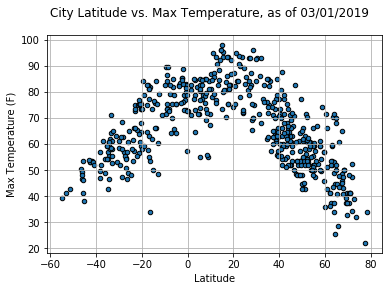

In [43]:
# setting graph frame
citiesWeather_df.plot.scatter('Lat', 'Max Temp', grid = True, edgecolor = 'black')

# naming X, Y and Title 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.suptitle('City Latitude vs. Max Temperature, as of 03/01/2019')

# saving + naming graph image into data folder
plt.savefig('plots/lat_VS_maxTemp.png')

# graph outcome show 
plt.show()

#### Latitude vs. Humidity Plot


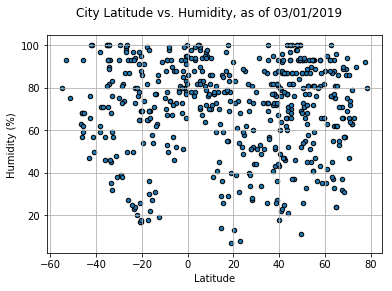

In [45]:
citiesWeather_df.plot.scatter('Lat','Humidity', grid =  True, edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.suptitle('City Latitude vs. Humidity, as of 03/01/2019')

plt.savefig('plots/lat_VS_humidity.png')

plt.show()


#### Latitude vs. Cloudiness Plot


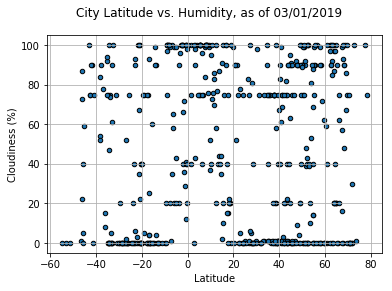

In [46]:
citiesWeather_df.plot.scatter('Lat', 'Cloudiness', grid = True, s=20, edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.suptitle('City Latitude vs. Humidity, as of 03/01/2019')

plt.savefig('plots/lat_VS_cloudiness.png')

plt.show()

####  Latitude vs. Wind Speed Plot

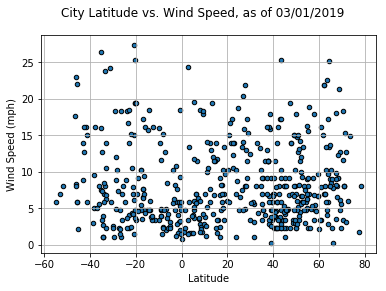

In [48]:
citiesWeather_df.plot.scatter('Lat','Wind Speed', grid = True, s=20, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.suptitle('City Latitude vs. Wind Speed, as of 03/01/2019')

plt.savefig('plots/lat_VS_windSpeed.png')

plt.show()